## Introduction to Customer Segmentation
    
    Customer segmentation is a marketing strategy that involves dividing customers into distinct groups based on shared characteristics. This approach helps businesses tailor their marketing efforts, product offerings, and communication strategies to better meet the needs of each segment.
    
### Objectives
    Identify high-value customers.
    Understand customer behavior.
    Develop targeted strategies.
    Measure performance within each segment.

    
    In this project, we will use machine learning techniques to analyze a dataset containing customer and transactional information. Our goal is to derive actionable insights and develop targeted strategies for each identified customer segment

### Import Packages

In [72]:
# import faissfrom sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import category_encoders as ce
from kmodes.kprototypes import KPrototypes
from sklearn.manifold import TSNE
import umap.umap_ as UMAP
from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,FunctionTransformer
plt.style.use('seaborn-v0_8-whitegrid') 
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('new_retail_data.csv')

### <span style="color: red;">DESCRIPTIONS OF FEATURES </span>


#### Demographic Information
    income → Customer’s yearly income
    customer segment → Predefined segment (if available)
#### Purchase & Spending Information
    total purchases → Total number of purchases made
    Amount → Amount spent in a single transaction
    Total_Amount → Total amount spent by the customer
#### Product Information
    product category → Type of product purchased (e.g., electronics, clothing)
    product brand → Brand of the purchased product
    product type → Specific type of product within a category
#### Customer Feedback & Ratings
    Feedback → Customer's review or comments
    Ratings → N'umeric rating given by the customer
#### Shipping & Payment Details
    Shipping_Method → How the product was shipped (e.g., standard, express)
    Payment_Method → How the customer paid (e.g., credit card, PayPal)
#### Order Status
    Order_Status → Status of the order (e.g., delivered, pending, canceled)

### REMOVING UNNECESSARY FEATURES

In [4]:
df = df.drop(columns=['Transaction_ID','Customer_ID','Name','Email','Phone','Address','Zipcode','Date','Time','City','State','Country','products'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               301837 non-null  float64
 1   Gender            301693 non-null  object 
 2   Income            301720 non-null  object 
 3   Customer_Segment  301795 non-null  object 
 4   Year              301660 non-null  float64
 5   Month             301737 non-null  object 
 6   Total_Purchases   301649 non-null  float64
 7   Amount            301653 non-null  float64
 8   Total_Amount      301660 non-null  float64
 9   Product_Category  301727 non-null  object 
 10  Product_Brand     301729 non-null  object 
 11  Product_Type      302010 non-null  object 
 12  Feedback          301826 non-null  object 
 13  Shipping_Method   301673 non-null  object 
 14  Payment_Method    301713 non-null  object 
 15  Order_Status      301775 non-null  object 
 16  Ratings           30

In [6]:
df.sample(5)

,Age,Gender,Income,Customer_Segment,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings
104041,46.0,Male,High,Regular,2023.0,December,8.0,279.115028,2232.920228,Electronics,Sony,Headphones,Excellent,Same-Day,Cash,Shipped,4.0
176,60.0,Male,Low,Regular,2023.0,December,2.0,92.295434,184.590868,Grocery,Nestle,Coffee,Good,Standard,PayPal,Shipped,4.0
57012,20.0,Male,Medium,New,2023.0,May,9.0,95.768160,861.913442,Electronics,Sony,Smartphone,Excellent,Express,PayPal,Processing,5.0
261377,26.0,Male,Low,Regular,2024.0,January,5.0,42.862807,214.314035,Grocery,Coca-Cola,Water,Good,Same-Day,Cash,Delivered,4.0
140055,26.0,Male,Medium,Regular,2023.0,January,8.0,418.823772,3350.590179,Electronics,Whirepool,Fridge,Good,Same-Day,Cash,Delivered,3.0


### HANDLING MISSING VALUE

In [7]:
df[df.isnull().any(axis=1)]

,Age,Gender,Income,Customer_Segment,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings
99,62.0,Female,Medium,Regular,NaN,November,4.0,104.506337,418.025349,Books,Penguin Books,Fiction,Excellent,Express,Cash,Processing,5.0
109,65.0,Male,Low,Regular,2023.0,June,4.0,478.109162,1912.436648,Grocery,Coca-Cola,Juice,NaN,Same-Day,Debit Card,Delivered,NaN
123,39.0,Male,Medium,Regular,2023.0,March,10.0,300.268442,3002.684416,Clothing,Adidas,Jacket,NaN,Standard,PayPal,Pending,NaN
142,37.0,Male,High,Regular,2023.0,September,1.0,253.054157,253.054157,Clothing,Zara,Dress,Average,NaN,PayPal,Pending,2.0
174,50.0,Male,High,Regular,2023.0,July,NaN,417.034001,1251.102005,Grocery,Pepsi,Water,Average,Standard,Credit Card,Pending,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301515,36.0,Female,Medium,Regular,2023.0,September,6.0,196.275704,1177.654223,Grocery,Nestle,Snacks,NaN,Express,Cash,Delivered,NaN
301567,37.0,Male,Low,New,2024.0,February,1.0,259.916898,259.916898,Books,Random House,Literature,Bad,NaN,Cash,Delivered,1.0
301738,35.0,Male,NaN,Premium,2023.0,November,2.0,176.845463,353.690926,Books,HarperCollins,Non-Fiction,Bad,Standard,Cash,Pending,1.0
301875,44.0,Male,High,Premium,2024.0,January,6.0,NaN,420.831710,Home Decor,Home Depot,Decorations,Bad,Same-Day,Cash,Delivered,1.0


In [8]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
for col in numerical_feature:
    df[col] = df[col].fillna(df[col].median())

In [9]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
for col in categorical_feature:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
df.isnull().sum()

Age                 0
Gender              0
Income              0
Customer_Segment    0
Year                0
Month               0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
dtype: int64

### HANDLING DUPLICATES VALUES

In [11]:
df[df.duplicated]

,Age,Gender,Income,Customer_Segment,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings
299658,51.0,Female,Low,Regular,2023.0,December,2.0,383.551718,767.103436,Grocery,Coca-Cola,Soft Drink,Good,Express,Credit Card,Shipped,3.0
299703,25.0,Male,Low,Regular,2023.0,October,5.0,380.547288,1902.736442,Grocery,Pepsi,Juice,Good,Express,Credit Card,Processing,3.0
299716,70.0,Female,Low,Regular,2023.0,April,10.0,10.144057,101.440574,Home Decor,IKEA,Decorations,Excellent,Express,Credit Card,Pending,5.0
299741,67.0,Male,Medium,Premium,2023.0,April,10.0,114.116636,1141.166356,Electronics,Apple,Smartphone,Excellent,Express,Credit Card,Delivered,4.0
299749,35.0,Female,Medium,Regular,2023.0,June,8.0,58.468049,467.744389,Electronics,Apple,Smartphone,Good,Same-Day,Credit Card,Shipped,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301804,25.0,Male,Medium,New,2023.0,September,7.0,345.239933,2416.679529,Home Decor,Home Depot,Tools,Excellent,Standard,Cash,Shipped,4.0
301890,57.0,Male,Medium,Regular,2023.0,March,7.0,270.600322,1894.202253,Clothing,Zara,Dress,Average,Express,Cash,Processing,2.0
301930,45.0,Male,Low,New,2023.0,May,6.0,405.282141,2431.692847,Home Decor,Bed Bath & Beyond,Kitchen,Good,Same-Day,Cash,Shipped,3.0
301947,49.0,Male,Low,New,2023.0,July,9.0,190.365767,1713.291906,Clothing,Adidas,Shoes,Good,Standard,Cash,Processing,4.0


In [12]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301943 entries, 0 to 301942
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               301943 non-null  float64
 1   Gender            301943 non-null  object 
 2   Income            301943 non-null  object 
 3   Customer_Segment  301943 non-null  object 
 4   Year              301943 non-null  float64
 5   Month             301943 non-null  object 
 6   Total_Purchases   301943 non-null  float64
 7   Amount            301943 non-null  float64
 8   Total_Amount      301943 non-null  float64
 9   Product_Category  301943 non-null  object 
 10  Product_Brand     301943 non-null  object 
 11  Product_Type      301943 non-null  object 
 12  Feedback          301943 non-null  object 
 13  Shipping_Method   301943 non-null  object 
 14  Payment_Method    301943 non-null  object 
 15  Order_Status      301943 non-null  object 
 16  Ratings           30

### CONVERT DATATYPE

In [15]:
df[['Age','Year']] = df[['Age','Year']].astype(int) 
df['Ratings'] = df['Ratings'].astype(str)
numerical_feature.remove('Ratings')
categorical_feature.append('Ratings')

In [16]:
df['Product_Type'] = df['Product_Type'].replace('Mitsubishi 1.5 Ton 3 Star Split AC','Mitsubishi')

In [17]:
df.nunique()

Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Year                     2
Month                   12
Total_Purchases         10
Amount              299297
Total_Amount        299306
Product_Category         5
Product_Brand           18
Product_Type            33
Feedback                 4
Shipping_Method          3
Payment_Method           4
Order_Status             4
Ratings                  5
dtype: int64

### STATISTICAL INFO

In [18]:
df.describe()

,Age,Year,Total_Purchases,Amount,Total_Amount
count,301943.000000,301943.000000,301943.000000,301943.000000,301943.000000
mean,35.477060,2023.164922,5.359296,255.166839,1367.303029
std,15.017318,0.371111,2.866899,141.306095,1128.431260
min,18.000000,2023.000000,1.000000,10.000219,10.003750
25%,22.000000,2023.000000,3.000000,133.029488,439.200578
50%,32.000000,2023.000000,5.000000,255.470969,1041.117547
75%,46.000000,2023.000000,8.000000,377.513750,2027.988901
max,70.000000,2024.000000,10.000000,499.997911,4999.625796


In [19]:
df.describe(include='O')

,Gender,Income,Customer_Segment,Month,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings
count,301943,301943,301943,301943,301943,301943,301943,301943,301943,301943,301943,301943
unique,2,3,3,12,5,18,33,4,3,4,4,5
top,Male,Medium,Regular,April,Electronics,Pepsi,Water,Excellent,Same-Day,Credit Card,Delivered,4.0
freq,187872,130500,146407,41569,71467,30565,24456,100929,104475,90371,130668,98044


### <span style ="color:green">INSIGHT</span>

<span style = "color : blue">
    - No Possile ways to get outlier values
</span>

## DISTRIBUTIONS OF NUMERICAL FEATURES

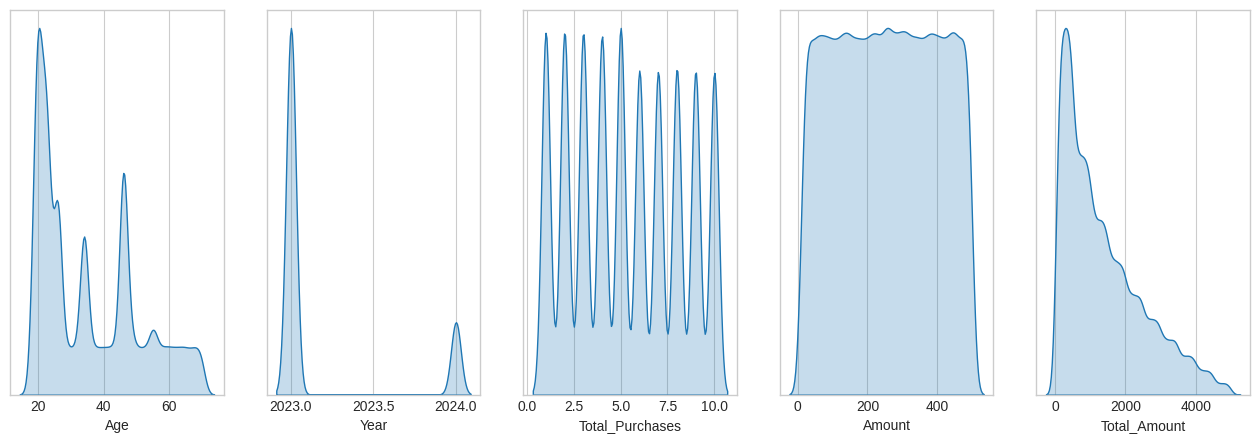

In [20]:
plt.figure(figsize=(16,5))
for i in range(len(numerical_feature)):
    plt.subplot(1,5,i+1)
    sns.kdeplot(data=df[numerical_feature[i]],fill=True)
    plt.yticks([])
    plt.ylabel('')
plt.show()

### <span style ="color:green">INSIGHT</span>

<span style = "color : black">
    <ul>
      <li><span style ="color:red">Age Distribution</span>: Most customers are between 20 and 30 years old.</li>
      <li><span style ="color:red">Purchase Frequency</span>: The majority of customers have made a total of 5 purchases.</li>
      <li><span style ="color:red">Spending Pattern</span>: Most customers have spent between 1,000 and 1,500 in total.</li>
    </ul>
</span>

## SOME CATEGORICAL FEATURES

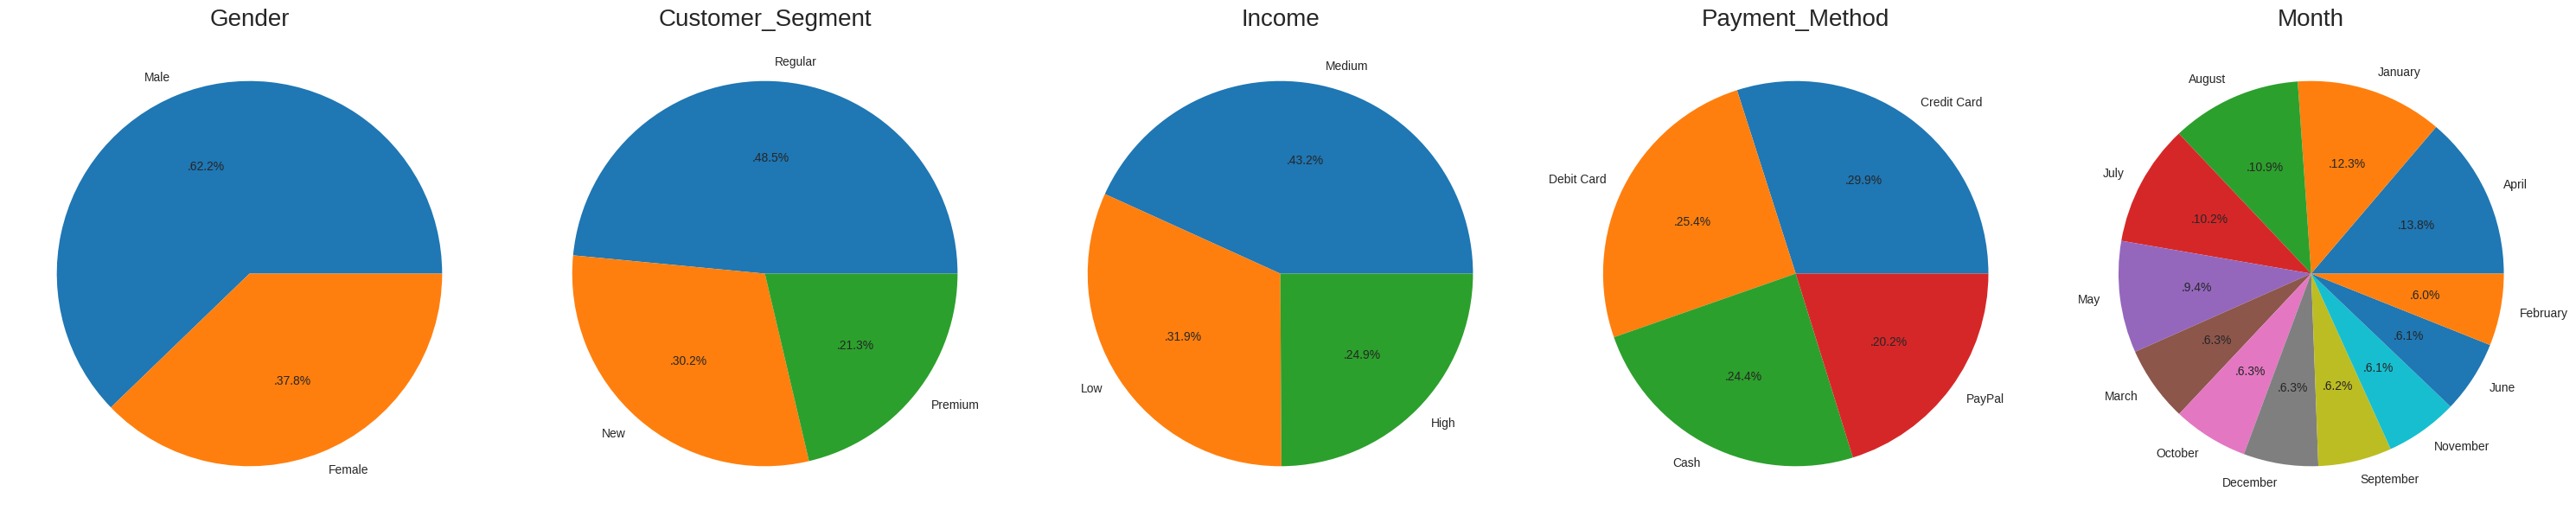

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

categ = ['Gender','Customer_Segment','Income','Payment_Method','Month']
for i in range(0,len(categ)):
    plt.subplot(1,5,i+1)
    size = df[categ[i]].value_counts()
    labels = size.index.tolist()
    plt.pie(size,labels = labels, autopct = '.%1.1f%%')
    plt.title(categ[i],fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()


### <span style ="color:green">INSIGHT</span>

<span style = "color : black">
    <ul>
      <li><span style ="color:gray">Majority of customers are <span style = "color:red">male</span>.</span></li>
      <li><span style ="color:gray"><span style = "color:red">Credit cards</span> are the most commonly used payment method.</span></li>
      <li><span style ="color:gray"><span style = "color:red">April, January, August, and July</span>witness the highest number of purchases.</span></li>
      <li><span style ="color:gray">The highest number of product sales occur in the <span style = "color:red">US</span> and <span style = "color:red">UK</span>, suggesting these countries are key markets for the business.</span></li>
    </ul>
</span>


### UNDERSTANDING CUSTOMER'S EXPERIENCE

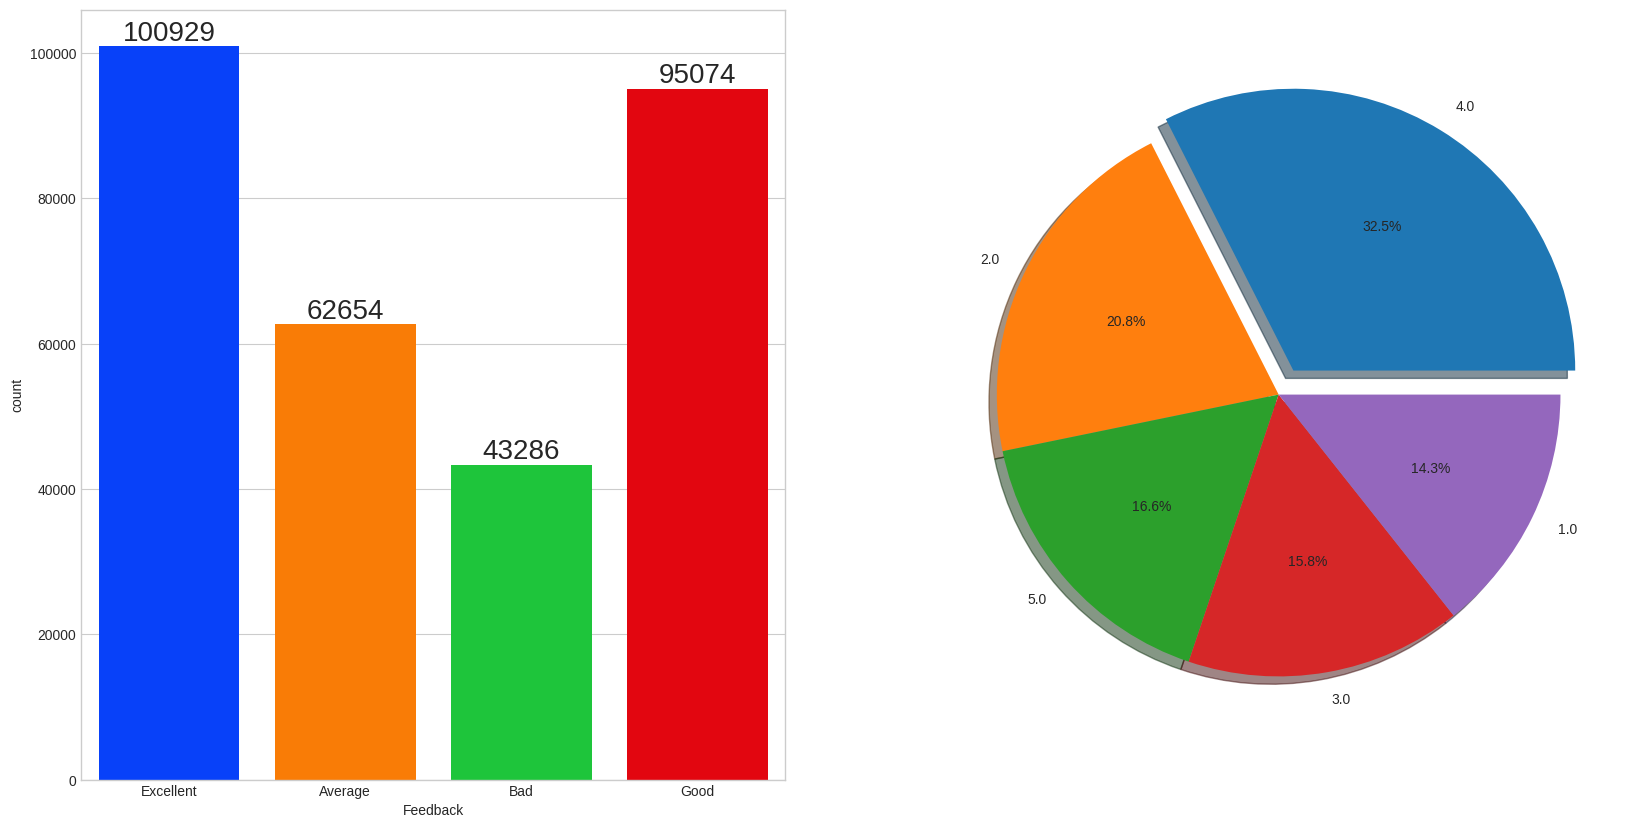

In [22]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Feedback'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for containers in ax[0].containers:
    ax[0].bar_label(containers,size=20)
plt.pie(x=df['Ratings'].value_counts(),labels=df['Ratings'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)

plt.show()

### <span style ="color:green">INSIGHT</span>

<span style = "color : black">
    <ul>
      <li><span style ="color:red">Customer's Feedback</span>: Most customers provide excellent or good feedback.</li>
      <li><span style ="color:red">Customers's Ratings</span>: The majority of customers have given a rating of 4.</li>
    </ul>
</span>


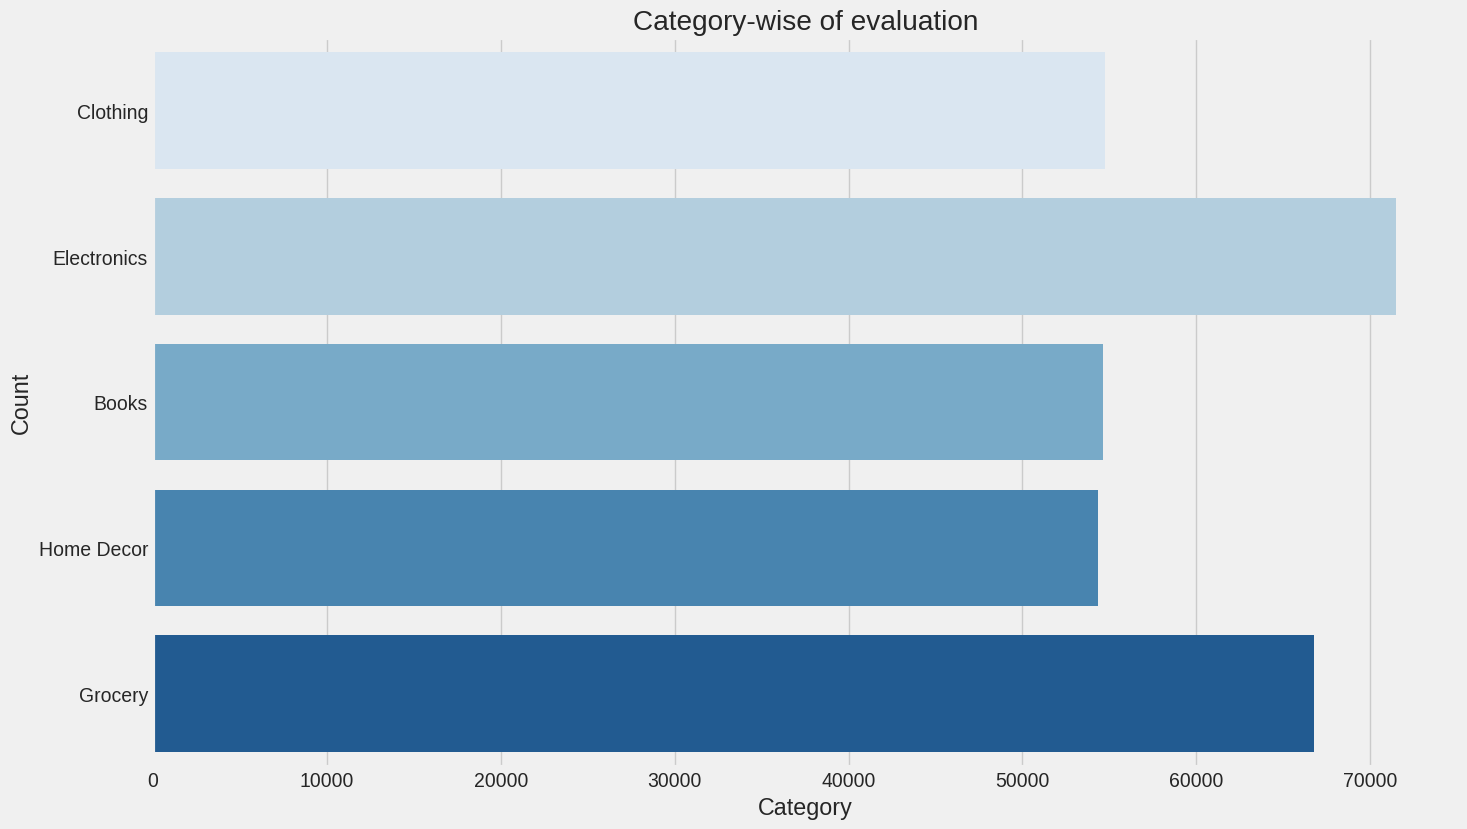

In [23]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Product_Category'],palette = 'Blues')
plt.title('Category-wise of evaluation')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## TOP 10 BRANDS WITH HIGHEST SALES

In [24]:
Brand = pd.DataFrame(df['Product_Brand'].value_counts())

In [25]:
Brand[:10]

,count
Product_Brand,
Pepsi,30565
Coca-Cola,18386
Samsung,18369
Zara,18367
HarperCollins,18350
Sony,18316
Bed Bath & Beyond,18239
Adidas,18233
Home Depot,18143


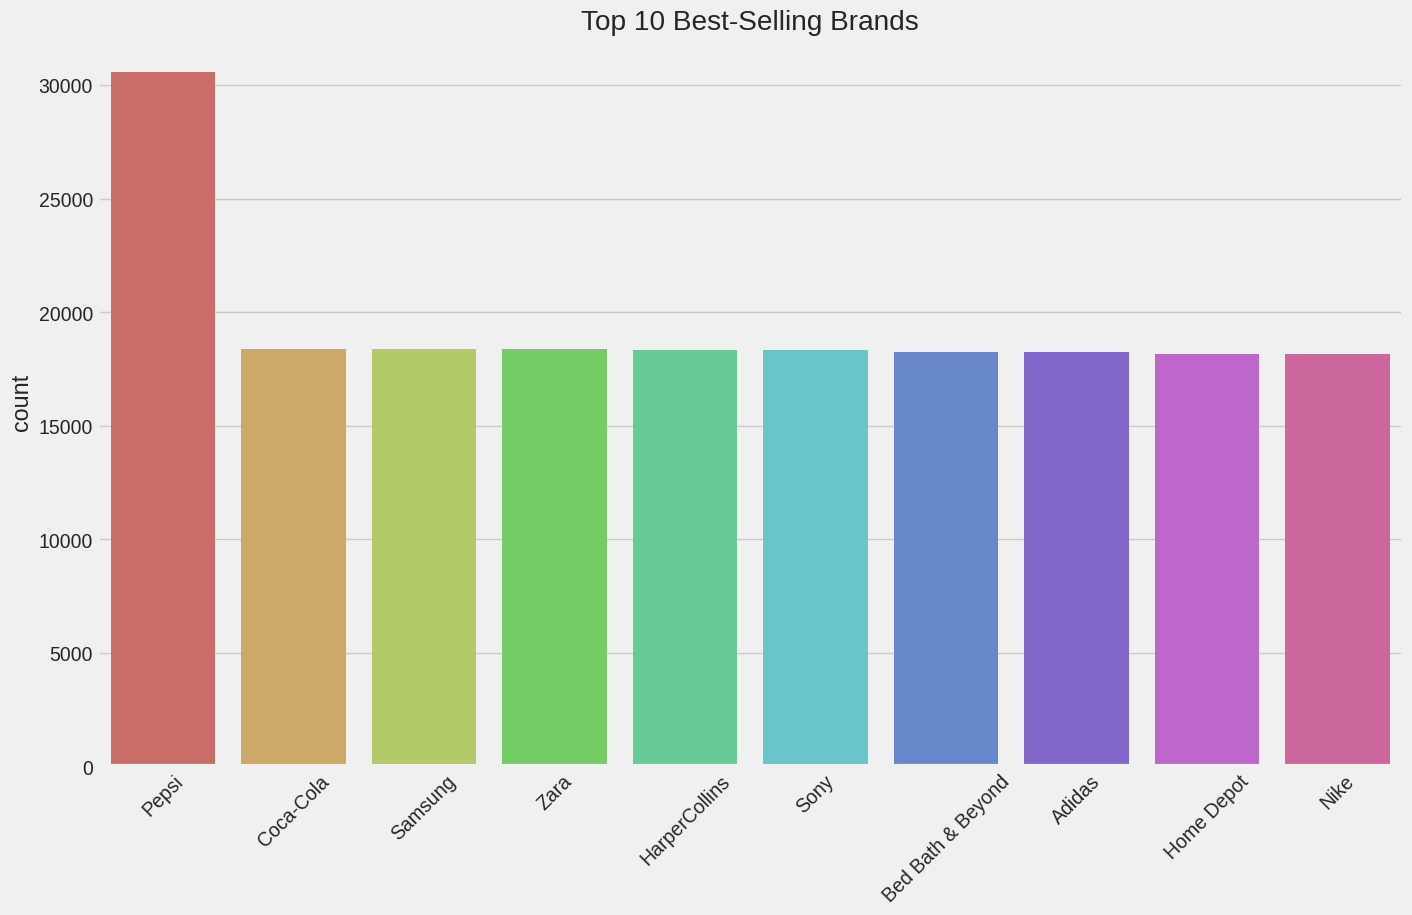

In [26]:
plt.rcParams['figure.figsize'] = (15,9)
sns.barplot(data=Brand[:10],x=Brand.index[:10],y='count',palette='hls')
plt.title('Top 10 Best-Selling Brands')
plt.xticks(rotation = 45)
plt.xlabel('')
plt.show()

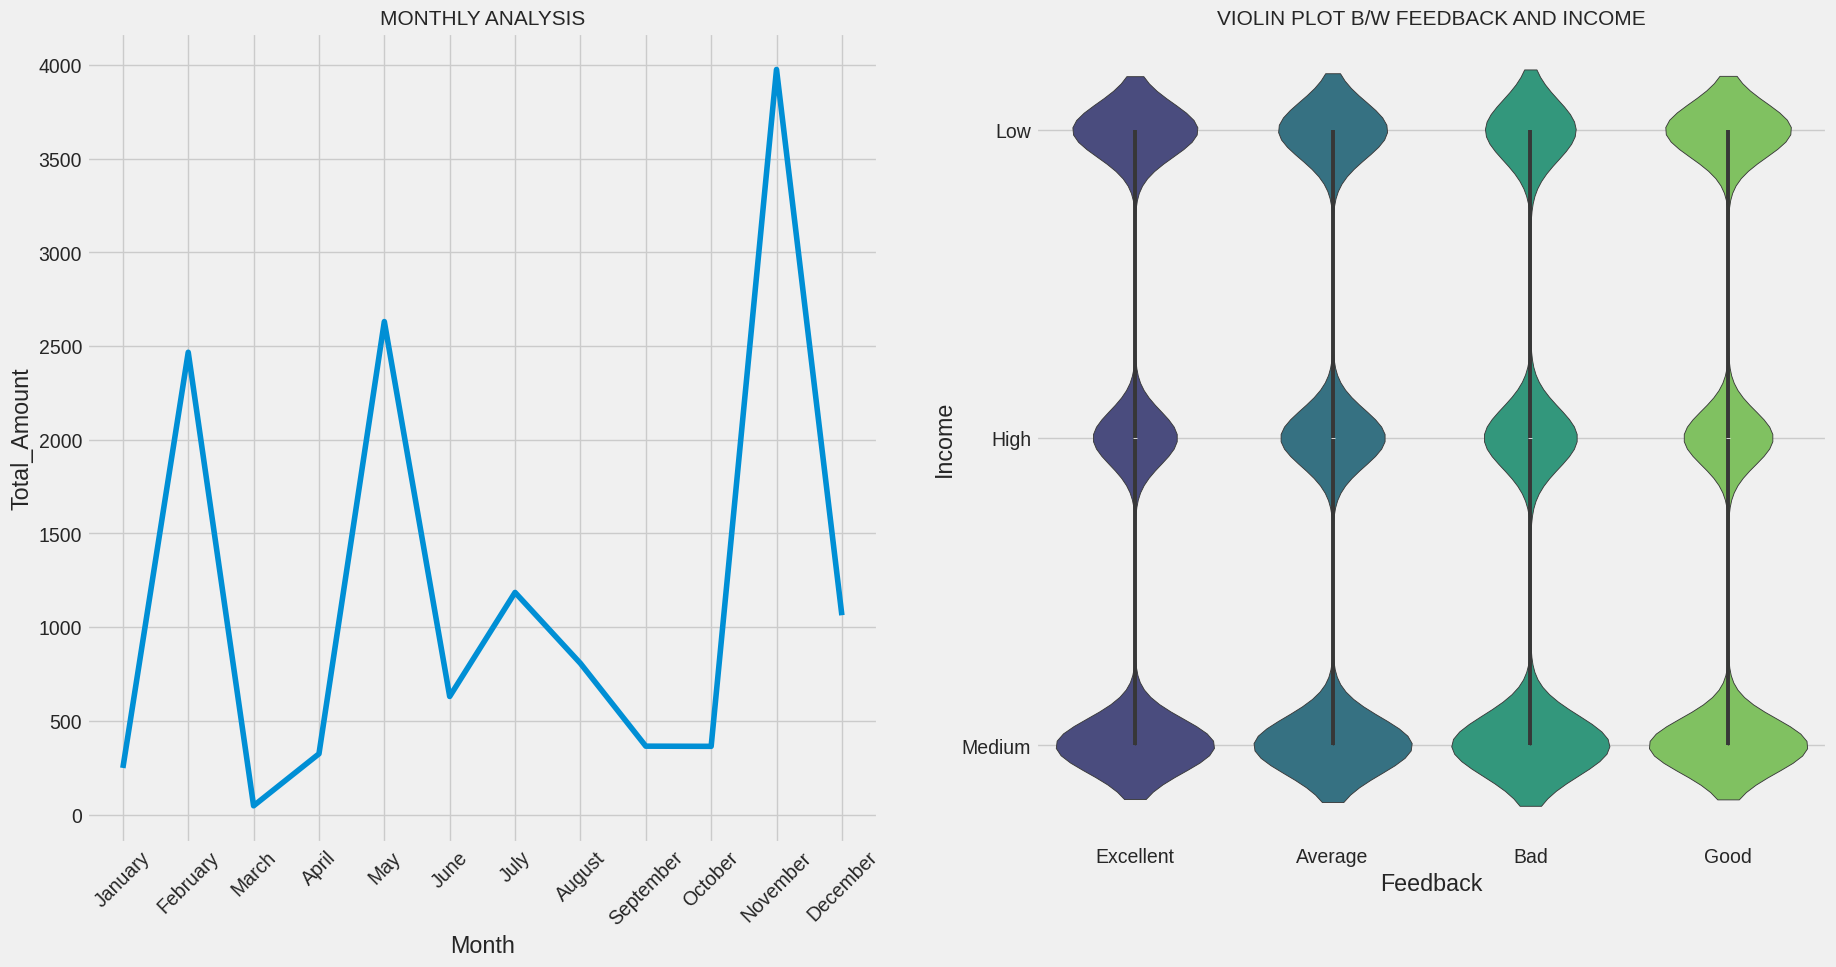

In [27]:
f, ax = plt.subplots(1,2,figsize=(20,10))

df_grouped = pd.DataFrame(df.groupby('Month')['Total_Amount'].sum()).reset_index()
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_grouped['Month'] = pd.Categorical(df_grouped['Month'],categories=month_order,ordered = True)
df_grouped = df_grouped.sort_values('Month')
sns.lineplot(data = df_grouped, x=df_grouped['Month'],y=df['Total_Amount'],markers='o',ax=ax[0])
ax[0].set_title('MONTHLY ANALYSIS',fontsize=15)
ax[0].tick_params(axis='x',rotation=45)

sns.violinplot(x=df['Feedback'],y=df['Income'],palette='viridis',ax=ax[1])
ax[1].set_title('VIOLIN PLOT B/W FEEDBACK AND INCOME',fontsize=15)
plt.show()

# FEATURE SELECTION

In [28]:
corr = df[numerical_feature].corr
corr()

,Age,Year,Total_Purchases,Amount,Total_Amount
Age,1.000000,-0.002320,0.033271,0.000890,0.022553
Year,-0.002320,1.000000,-0.002219,0.001683,-0.001826
Total_Purchases,0.033271,-0.002219,1.000000,0.000340,0.648298
Amount,0.000890,0.001683,0.000340,1.000000,0.669957
Total_Amount,0.022553,-0.001826,0.648298,0.669957,1.000000


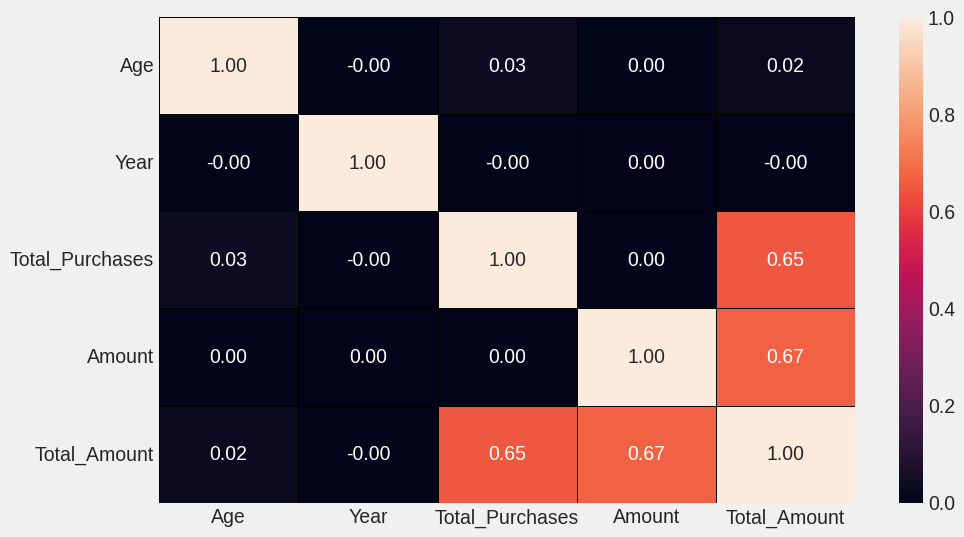

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(data=corr(),annot=True,fmt=".2f",linewidths=0.5,linecolor="black",cbar=True)
plt.show()

In [30]:
#Removing Amount Feature
df = df.drop(columns=['Amount'],axis=1)

### <span style ="color:green">INSIGHT</span>

<span style = "color : black">
    <ul>
      <pre>I have decided to remove the <span style ="color:red">Amount</span> feature and keep <span style ="color:red">Total_Amount</span> for analysis. Since Total_Amount represents the overall spending of customers, it provides a more complete picture of their purchasing behavior. This will help in making better segmentation decisions.</pre>
    </ul>
</span>

<b><span style ="color:green">FEATURE SELECTION FOR K-MEANS CLUSTERING</span><b> 
<pre>For customer segmentation using K-Means clustering, I have carefully selected the following features based on their relevance to customer behavior and purchasing patterns:</pre>

 - <span style ="color:red">Age, Gender, Income </span> – Capture demographics and spending capacity.
 - <span style ="color:red">Total_Purchases, Total_Amount</span> – Reflect buying behavior.
 - <span style ="color:red">Product_Category, Product_Brand</span> – Show product preferences.
 - <span style ="color:red">Ratings</span> – Indicates customer satisfaction.


In [88]:
data = pd.DataFrame(df,columns=['Age','Gender','Income','Total_Purchases','Total_Amount','Product_Category','Product_Brand','Ratings'])

from sklearn.utils import resample
data = resample(data,n_samples=30000,random_state=42).reset_index(drop=True) # uses for reducing computational cost


## SELECTED DATAFRAME

In [89]:
dataFrame = data.copy()
data

,Age,Gender,Income,Total_Purchases,Total_Amount,Product_Category,Product_Brand,Ratings
0,46,Male,Medium,7.0,3383.437239,Clothing,Zara,5.0
1,26,Male,High,3.0,425.549428,Clothing,Adidas,2.0
2,26,Male,Low,3.0,610.000187,Clothing,Adidas,4.0
3,53,Female,High,6.0,306.083008,Home Decor,IKEA,3.0
4,46,Male,Low,6.0,1336.145277,Books,Random House,4.0
...,...,...,...,...,...,...,...,...
29995,26,Male,High,6.0,413.252214,Clothing,Zara,2.0
29996,46,Male,Medium,4.0,1228.383376,Electronics,Apple,5.0
29997,22,Male,Medium,9.0,1367.918275,Electronics,Samsung,3.0
29998,19,Male,Medium,4.0,1184.176284,Grocery,Nestle,1.0


In [94]:
#ordinal encoding
ordinal = OrdinalEncoder(categories=[['Low','Medium','High']])
data['Income'] = ordinal.fit_transform(data[['Income']])

In [95]:
numerical_feature = data.select_dtypes(exclude='object').columns
scaler = StandardScaler()
data[numerical_feature] = scaler.fit_transform(data[numerical_feature])

In [36]:
X = data.to_numpy()
category = [1,5,6,7]

In [37]:
X.shape

(30000, 8)

# CLUSTERING!!

### FINDING K VALUE BY ELBOW METHOD

In [38]:
cost_value = []
for k in range(1,10):
    kproto = KPrototypes(n_clusters=k,init='cao',random_state=42,n_jobs=1)
    kproto.fit_predict(X,categorical = category)
    cost_value.append(kproto.cost_)

In [39]:
cost_value

[160769.99999999834,
 125696.05956815773,
 108918.66296451267,
 98333.212279574,
 91129.0411072689,
 85460.24244858003,
 81235.31833989333,
 77873.22594124825,
 74845.05545838318]

### <span style ="color:green">INSIGHT</span>

### <span style ="color:red">Finding the Optimal K:</span>

 - The elbow method plot of cost_value shows a significant drop at <span style ="color:red">k=3</span>, indicating a good balance between compact clusters and low cost.
 - The KneeLocator method also suggests <span style ="color:red">k=3</span>, further confirming this as the optimal choice.

### <span style ="color:red">Why k=3?</span>

 - Choosing k=3 prevents overfitting (too many clusters) while still capturing distinct groups.
 - After k=3, the reduction in cost becomes less significant, meaning additional clusters do not add much value.

### <span style ="color:red">Visualization Confirmation</span>

 - Below the 'elbow' plot, which confirms 'k=3' is the optimal choice:

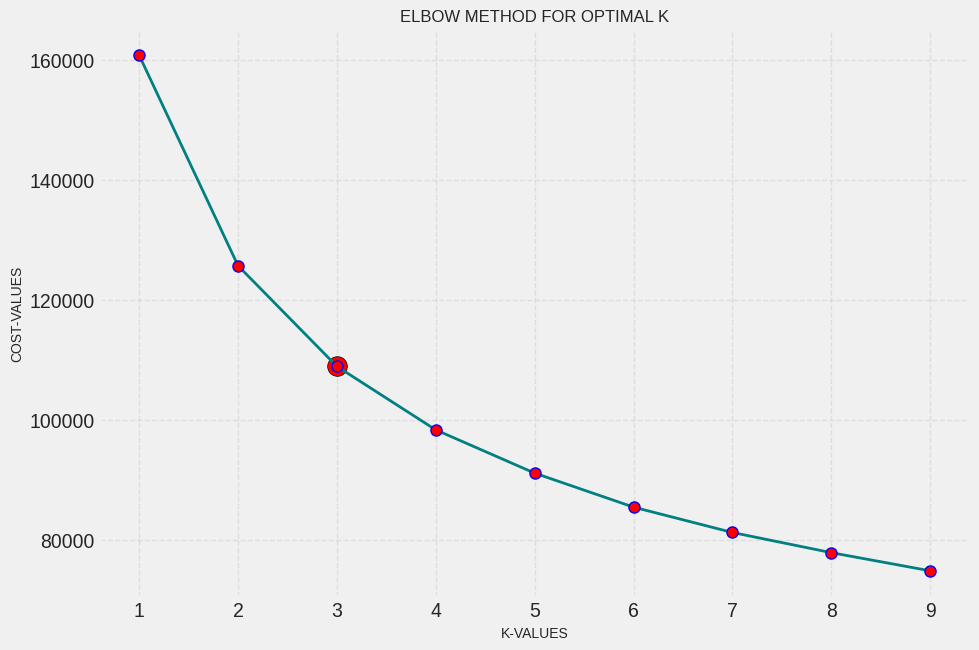

In [316]:
plt.figure(figsize=(10,7))
plt.plot(range(1,10),cost_value,marker='o',color='Teal',linewidth=2,markersize=8,markerfacecolor='red',markeredgecolor='blue')
plt.title('ELBOW METHOD FOR OPTIMAL K',fontsize=12)
plt.xticks(range(1,11))
plt.xlabel('K-VALUES',fontsize=10)
plt.ylabel('COST-VALUES',fontsize=10)
optimal_k = 3
plt.scatter(optimal_k,cost_value[optimal_k-1],color='red',edgecolors='black',s=200)
plt.grid(True,linestyle='--',alpha=0.5)
plt.savefig("elbow.png", dpi=300)
plt.show()

In [44]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,10),cost_value,curve='convex',direction='decreasing')
k1.elbow

3

### MODEL TRAINING

In [45]:
kproto = KPrototypes(n_clusters=3,init='cao',random_state=42)
clusters = kproto.fit_predict(X,categorical = category)

### ASSIGNING CLUSTERS TO DATAFRAME

In [92]:
dataFrame['Cluster'] = clusters

In [93]:
dataFrame

,Age,Gender,Income,Total_Purchases,Total_Amount,Product_Category,Product_Brand,Ratings,Cluster
0,46,Male,Medium,7.0,3383.437239,Clothing,Zara,5.0,1
1,26,Male,High,3.0,425.549428,Clothing,Adidas,2.0,2
2,26,Male,Low,3.0,610.000187,Clothing,Adidas,4.0,2
3,53,Female,High,6.0,306.083008,Home Decor,IKEA,3.0,0
4,46,Male,Low,6.0,1336.145277,Books,Random House,4.0,0
...,...,...,...,...,...,...,...,...,...
29995,26,Male,High,6.0,413.252214,Clothing,Zara,2.0,2
29996,46,Male,Medium,4.0,1228.383376,Electronics,Apple,5.0,0
29997,22,Male,Medium,9.0,1367.918275,Electronics,Samsung,3.0,1
29998,19,Male,Medium,4.0,1184.176284,Grocery,Nestle,1.0,2


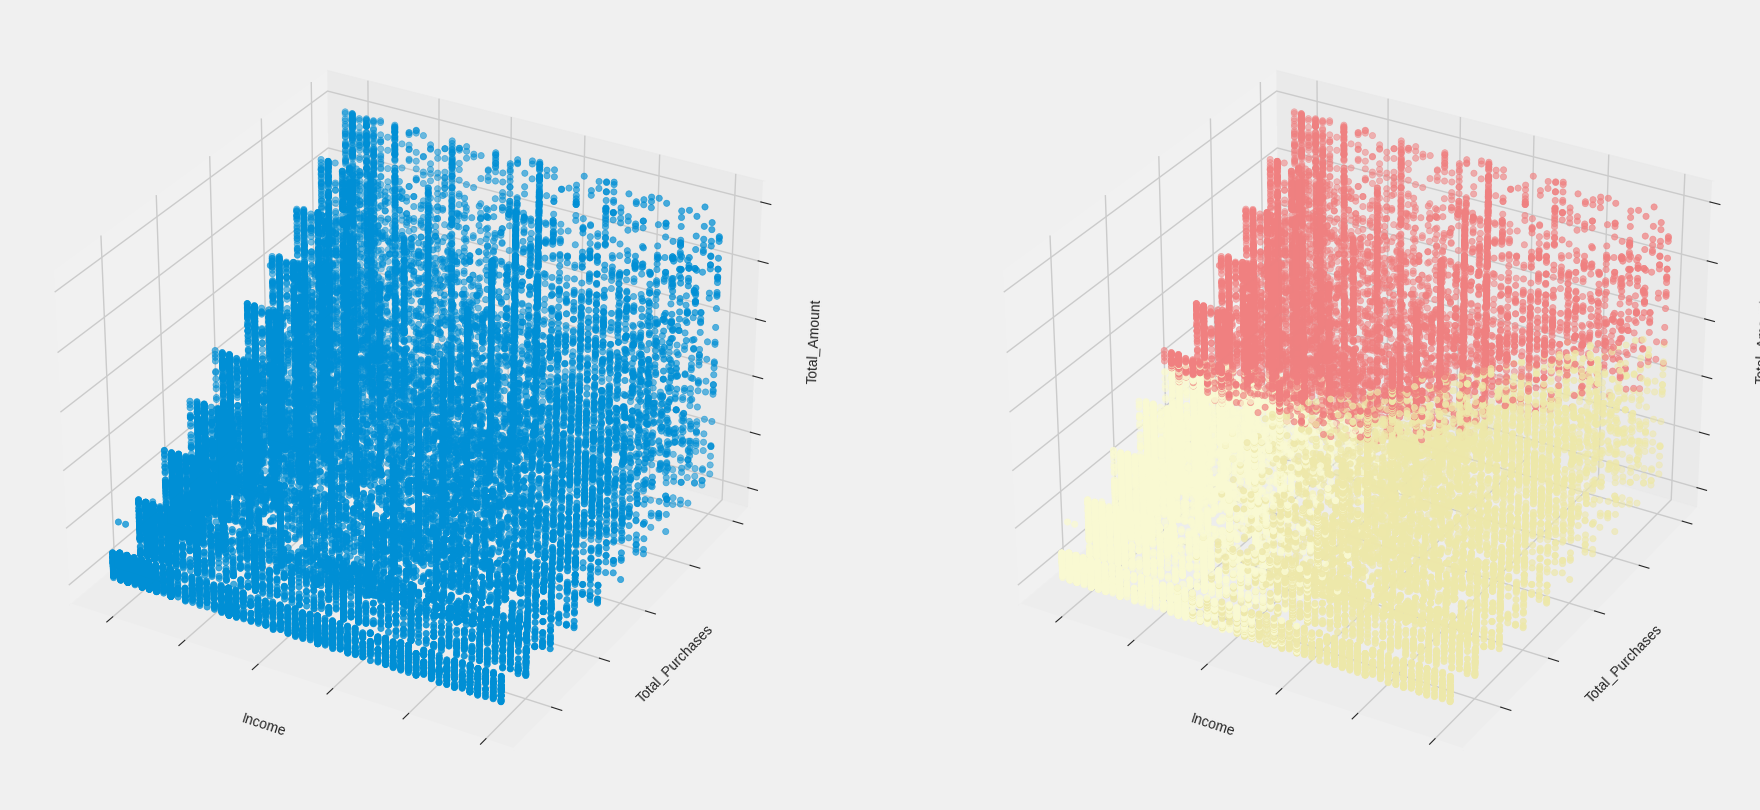

In [312]:
cluster_color = {
    0: '#EEE8AA',
    1: '#F08080',
    2: '#FAFAD2',
}
colors = dataFrame['Cluster'].map(cluster_color)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1,projection="3d")
scatter = ax1.scatter(dataFrame['Age'],dataFrame['Total_Purchases'],dataFrame['Total_Amount'])

ax1.set_xlabel('Income',fontsize=10)
ax1.set_ylabel('Total_Purchases',fontsize=10)
ax1.set_zlabel('Total_Amount',fontsize=10)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])


ax2 = fig.add_subplot(1,2,2,projection="3d")
scatter = ax2.scatter(dataFrame['Age'],dataFrame['Total_Purchases'],dataFrame['Total_Amount'],c=colors)

ax2.set_xlabel('Income',fontsize=10)
ax2.set_ylabel('Total_Purchases',fontsize=10)
ax2.set_zlabel('Total_Amount',fontsize=10)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_zticklabels([])


plt.savefig("customer3d.png", dpi=300)
plt.show()

<Figure size 2000x900 with 0 Axes>

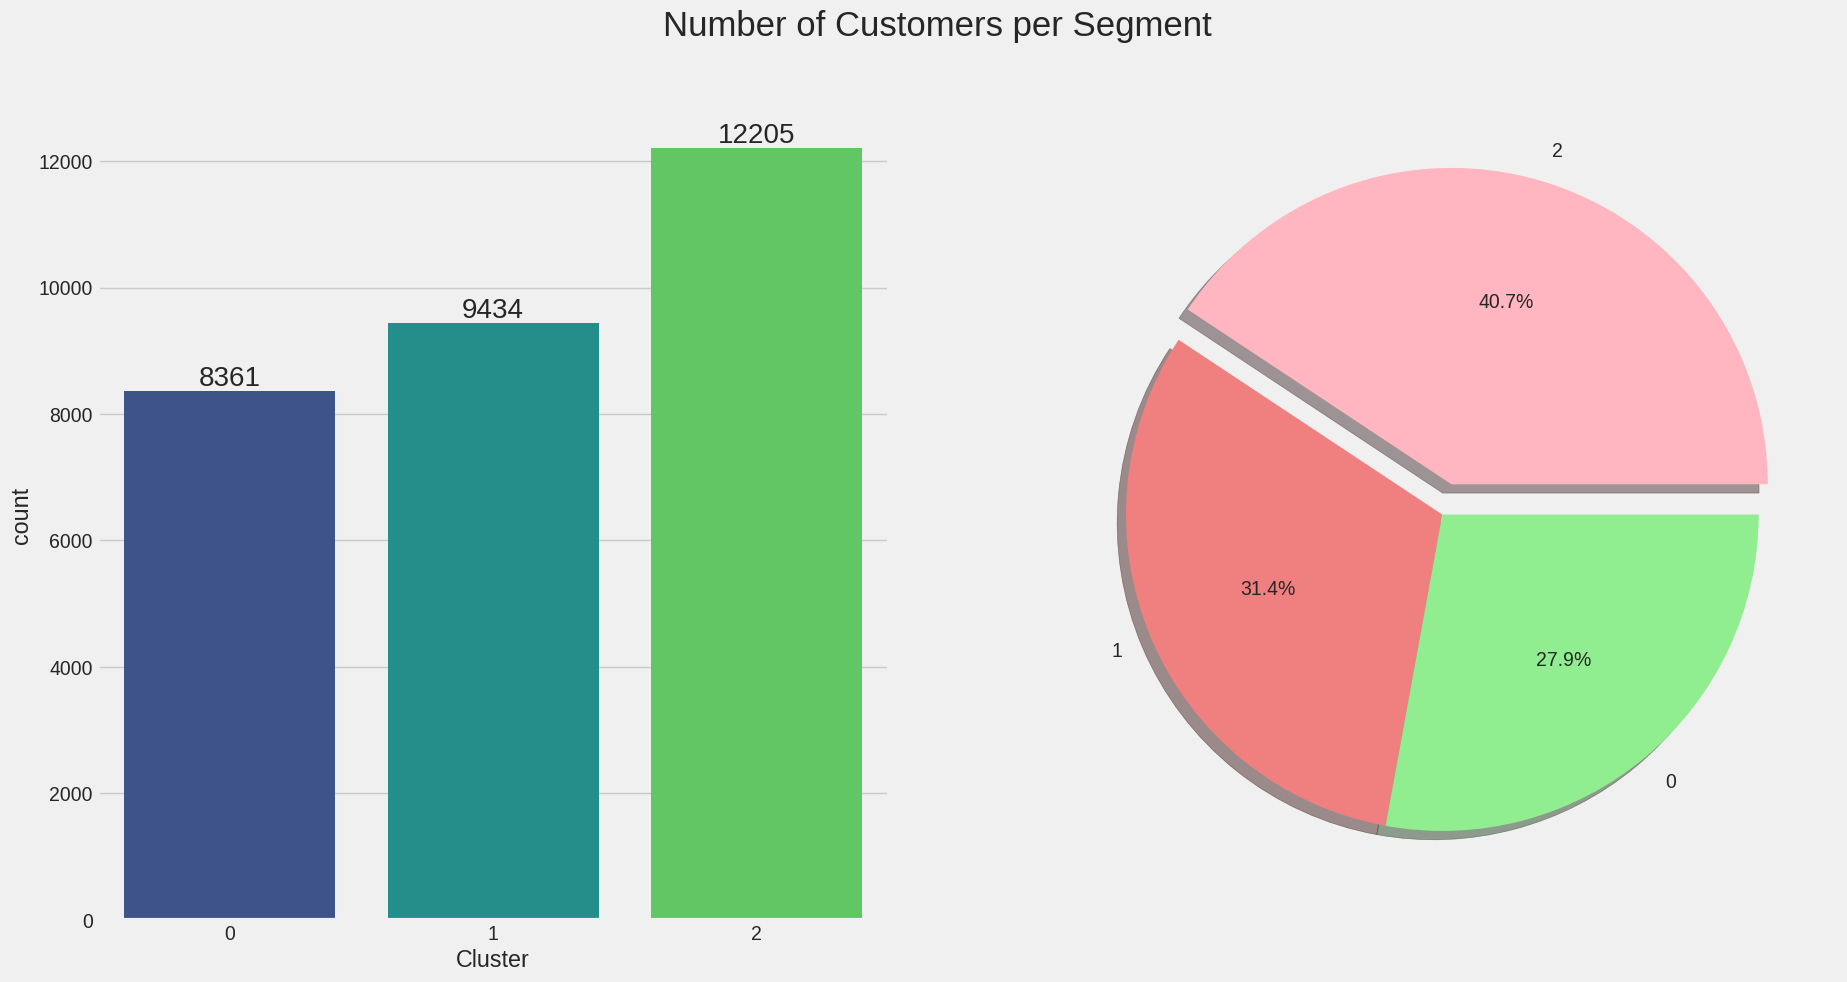

In [314]:

pie_color = {
    0: '#90EE90',
    1: '#F08080',
    2: '#FFB6C1',
}
pie_colors = [pie_color[label] for label in dataFrame['Cluster'].value_counts().index]

f,ax = plt.subplots(1,2,figsize=(20,10))
f.suptitle('Number of Customers per Segment',fontsize=25)
sns.countplot(x=dataFrame['Cluster'], palette='viridis',ax=ax[0],saturation=0.95)
for containers in ax[0].containers:
    ax[0].bar_label(containers,size=20)
    
ax[1].pie(x=dataFrame['Cluster'].value_counts(),labels=dataFrame['Cluster'].value_counts().index,explode=[0.1,0,0],autopct='%1.1f%%',shadow=True,colors=pie_colors)
plt.savefig("customer_segmentation.png", dpi=300)
plt.show()

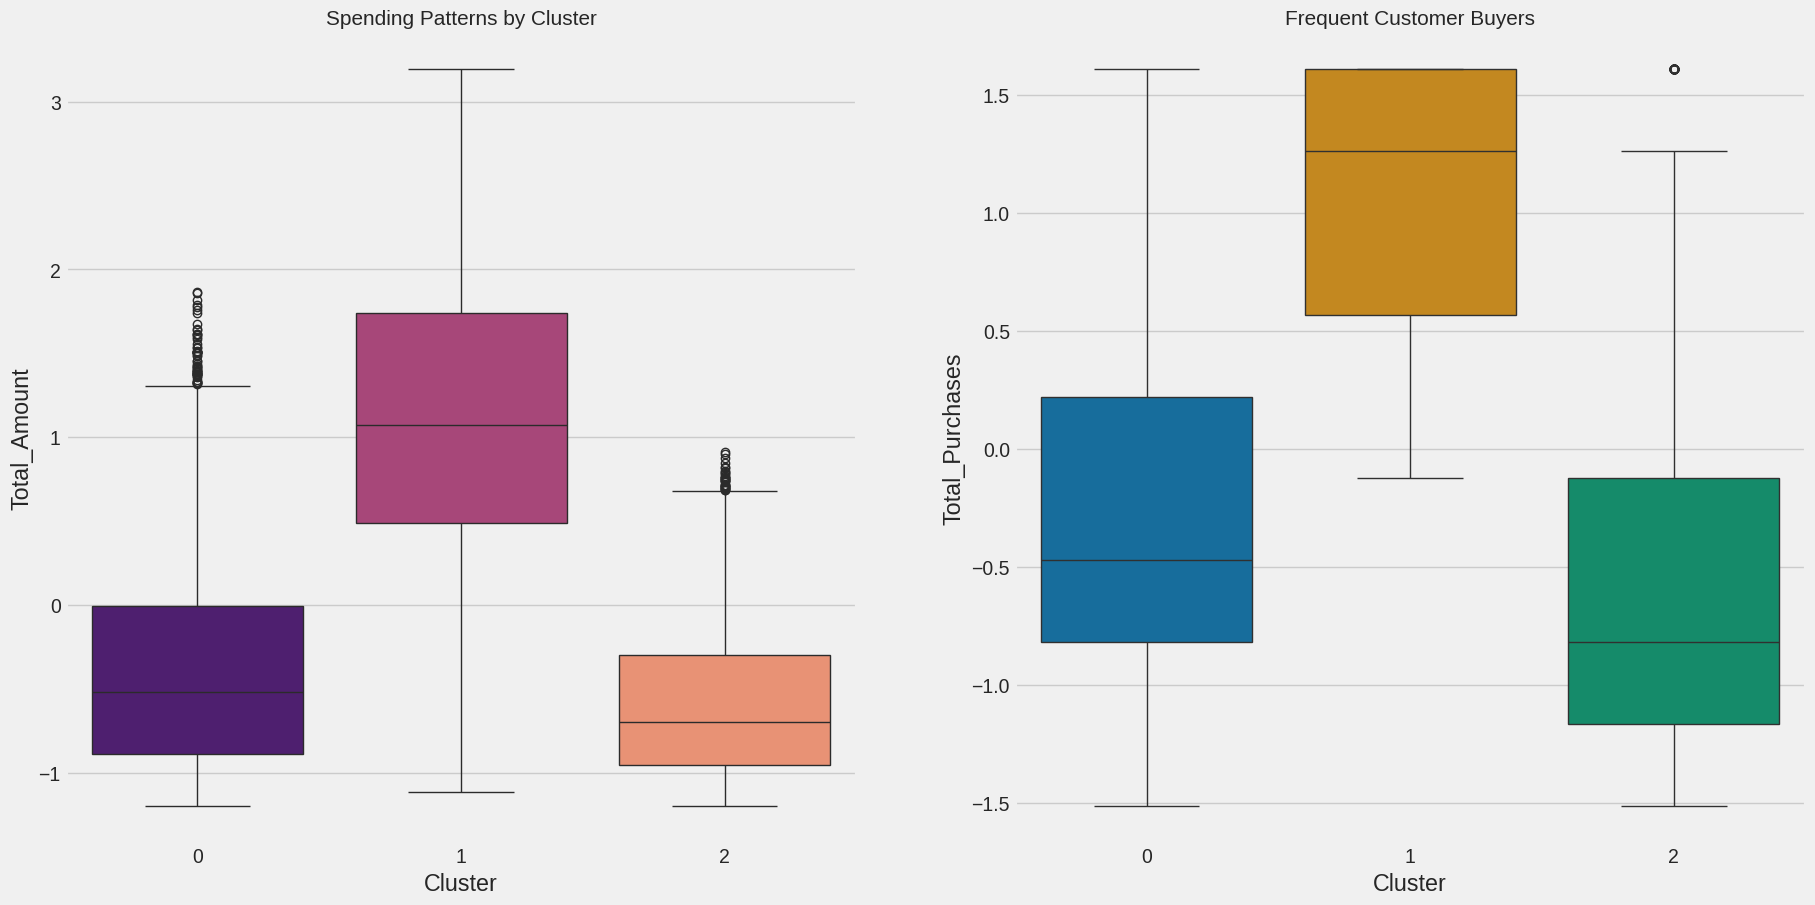

In [291]:
f, ax = plt.subplots(1,2,figsize=(20,10))

sns.boxplot(x=dataFrame['Cluster'], y=data['Total_Amount'],palette='magma',ax=ax[0])
ax[0].set_title('Spending Patterns by Cluster',fontsize=15)

sns.boxplot(x=dataFrame['Cluster'], y=data['Total_Purchases'],palette='colorblind',ax=ax[1])
ax[1].set_title('Frequent Customer Buyers',fontsize=15)
plt.show()

dataFrame

In [241]:
Cluster0 = dataFrame[dataFrame['Cluster'] == 0 ]
Cluster1 = dataFrame[dataFrame['Cluster'] == 1 ]
Cluster2 = dataFrame[dataFrame['Cluster'] == 2 ]

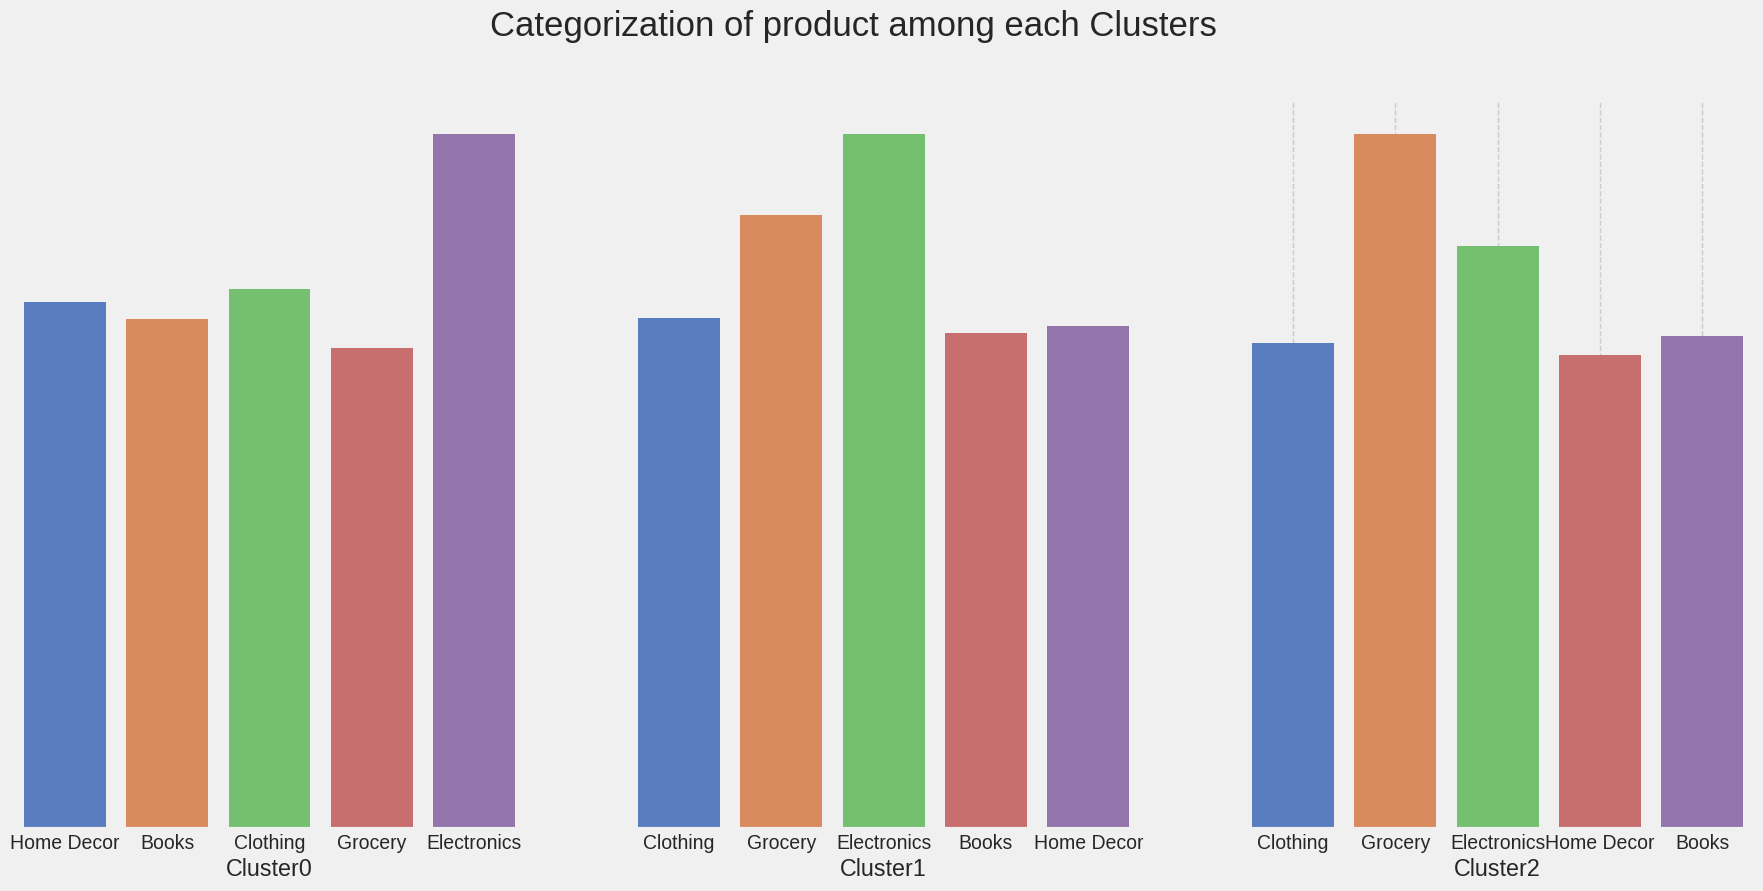

In [317]:
plt.rcParams['figure.figsize'] = (20,9)
plt.suptitle('Categorization of product among each Clusters',fontsize=25)

plt.subplot(1,3,1)
sns.countplot(data=Cluster0,x='Product_Category',palette='muted')
plt.xlabel('Cluster0')
plt.ylabel('')
plt.yticks([])


plt.subplot(1,3,2)
sns.countplot(data=Cluster1,x='Product_Category',palette='muted')
plt.xlabel('Cluster1')
plt.ylabel('')
plt.yticks([])

plt.subplot(1,3,3)
sns.countplot(data=Cluster2,x='Product_Category',palette='muted')
plt.xlabel('Cluster2')
plt.ylabel('')
plt.yticks([])


plt.grid(True,linestyle='--')
plt.savefig("customerCluster.png", dpi=300)
plt.show()

In [282]:
age_sataty = dataFrame.groupby('Cluster')['Age'].describe()

In [283]:
age_sataty

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,8361.0,53.255472,9.373065,28.0,46.0,52.0,61.0,70.0
1,9434.0,32.548972,12.813158,18.0,22.0,26.0,43.0,70.0
2,12205.0,25.667677,6.954835,18.0,20.0,23.0,29.0,52.0


# CLUSTER SEGMENTATION REPORT

## <span style ="color:green">CLUSTER INSIGHTS</span>

<table style='width:100%; text-align:left; border-collapse: collapse;'>
    <tr>
        <th style='padding:10px; border:2px solid black;'>Cluster 0: Medium Spenders</th>
        <th style='padding:10px; border:2px solid black;'>Cluster 1: High Spenders</th>
        <th style='padding:10px; border:2px solid black;'>Cluster 2: Budget Shoppers</th>
    </tr>
    <tr>
        <td style='padding:20px; border:1px solid black;'>
            Represents 27% of customers<br>
            Spending Pattern: Medium spenders<br>
            Income Level: Low-income group<br>
            Top Purchased Category: Electronics<br>
            Age Distribution: Mixed-aged customers<br>
            Buying Behavior: Frequent buyers
        </td>
        <td style='padding:20px; border:1px solid black;'>
            Represents 31% of customers<br>
            Spending Pattern: High spenders<br>
            Income Level: Medium-income group<br>
            Top Purchased Category: Electronics<br>
            Age Distribution: Mixed-aged customers<br>
            Buying Behavior: Not frequent buyers
        </td>
        <td style='padding:20px; border:1px solid black;'>
            Represents 40% of customers<br>
            Spending Pattern: Low spenders<br>
            Income Level: Medium-income group<br>
            Top Purchased Category: Grocery items<br>
            Age Distribution: Mostly young customers<br>
            Buying Behavior: Frequent buyers
        </td>
    </tr>
</table>




<span style="display: block; border-top: 1px solid black; margin: 10px 0;"></span>

<h2><b><span style ="color:red">Medium Spenders (Frequent Buyers)</span></b></h2>

 <h3><span style ="color:green">Insights:</span></h3>

    These customers purchase electronics frequently despite having a lower income.
    They are loyal customers and contribute to consistent revenue.

 <h3><b><span style ="color:blue">Business Recommendations:</span></b></h3>
 
 - <span style ="color:red">Loyalty Programs</span>: Offer rewards or discounts for repeat purchases to increase retention.
 - <span style ="color:red">Installment Plans</span>: Provide flexible payment options for expensive electronics.
 - <span style ="color:red">Targeted Marketing</span>: Send exclusive offers or bundle deals on electronics.

<span style="display: block; border-top: 1px solid black; margin: 10px 0;"></span>

<span style="display: block; border-top: 1px solid black; margin: 10px 0;"></span>

<h2><b><span style ="color:red">High Spenders (Irregular Buyers)</span></b></h2>

 <h3><span style ="color:green">Insights:</span></h3>

    They have a higher spending capacity but do not purchase frequently.
    Their buying behavior is inconsistent, indicating they might be impulse buyers.

 <h3><b><span style ="color:blue">Business Recommendations:</span></b></h3>
 
 - <span style ="color:red">Personalized Promotions</span>: Use data-driven marketing to re-engage inactive customers.
 - <span style ="color:red">Limited-Time Discounts</span>: Offer seasonal or exclusive deals to encourage purchases.
 - <span style ="color:red">Premium Memberships</span>: Introduce VIP programs with exclusive benefits to encourage loyalty.

<span style="display: block; border-top: 1px solid black; margin: 10px 0;"></span>

<span style="display: block; border-top: 1px solid black; margin: 10px 0;"></span>

<h2><b><span style ="color:red">Budget Shoppers (Frequent Buyers)</span></b></h2>

 <h3><span style ="color:green">Insights:</span></h3>

    They shop frequently but focus on low-budget items like groceries.
    They are mostly young customers, meaning long-term potential for brand engagement.

 <h3><b><span style ="color:blue">Business Recommendations:</span></b></h3>
 
 - <span style ="color:red">Subscription Models</span>: Offer monthly grocery subscription services for convenience.
 - <span style ="color:red">Student Discounts</span>: Since many are young, provide student-friendly offers.
 - <span style ="color:red">Upselling & Cross-Selling</span>: Recommend higher-value products during checkout.

<span style="display: block; border-top: 1px solid black; margin: 10px 0;"></span>